# AAP Homework 1

Tim Schwartz

Import Libraries; plot inline

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

%matplotlib inline

Load the Data

In [2]:
tax_df = pd.read_csv("data/raw/TaxInfo.csv")

Check the info() to make sure it matches the example

In [3]:
tax_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   HHI             1004 non-null   int64 
 1   HHDL            1004 non-null   int64 
 2   Married         1004 non-null   int64 
 3   CollegGrads     1004 non-null   int64 
 4   AHHAge          1004 non-null   int64 
 5   Cars            1004 non-null   int64 
 6   Filed_2017      1004 non-null   int64 
 7   Filed_2016      1004 non-null   int64 
 8   Filed_2015      1004 non-null   int64 
 9   PoliticalParty  1004 non-null   object
dtypes: int64(9), object(1)
memory usage: 78.6+ KB


## Automated EDA

Giving the Pandas Profiling and Sweet Viz a try.  As advised, I did this in JupyterNotebooks and then switched back to JupyterLab.

In [4]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(tax_df, title="Pandas Profiling Report")
#profile.to_file("output/pandas_profiling_report.html")

In [5]:
#import sweetviz
#report = sweetviz.analyze(tax_df)
#report.show_html("output/sweetviz_report.html")

## Preprocess And Creating Pipeline

Breaking it up by object/number (like the examples) does seem good in general, but for this case, I am going to select them manually (at least at first).

The following look like a good fit for Standard Scaler:

HHI - household income<br />
HHDL - household debt level<br />
CollegGrads - number of college grads in the household<br />
AHHAge - average age of people in the household<br />
Cars - number of cars in the household<br />

The following look like a good fit for One Hot Encoder:

Married - categorical with a few levels<br />
Filed_2017 - 1 means they filed a tax return with the IRS for 2017<br />
Filed_2016 - 1 means they filed a tax return with the IRS for 2016<br />
Filed_2015 - 1 means they filed a tax return with the IRS for 2015<br />

***PoliticalParty - categorical with 3 levels*** Left out for now.


Since it is mostly copy/paste, I just had to try the other penalities.


In [6]:
numeric_cols = ['HHI', 'HHDL', 'CollegGrads', 'AHHAge', 'Cars']
categorical_cols = ['Married', 'Filed_2017', 'Filed_2016', 'Filed_2015']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

clf_model_liblinear = LogisticRegression(penalty='l2', C=1, solver='liblinear', max_iter=500)
clf_model_lbfgs = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=500)
clf_model_newton = LogisticRegression(penalty='l2', C=1, solver='newton-cg', max_iter=500)
clf_model_sag = LogisticRegression(penalty='l2', C=1, solver='sag', max_iter=500)
clf_model_saga = LogisticRegression(penalty='l2', C=1, solver='saga', max_iter=500)

clf_liblinear = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_liblinear)])
clf_lbfgs = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_lbfgs)])
clf_newton = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_newton)])
clf_sag = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_sag)])
clf_saga = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', clf_model_saga)])

The example had a graphic - recreating that here:

In [7]:
from sklearn import set_config

set_config(display='diagram')
clf_saga

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['HHI', 'HHDL', 'CollegGrads',
                                                   'AHHAge', 'Cars']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Married', 'Filed_2017',
                                                   'Filed_2016',
                                                   'Filed_2015'])])),
                ('classifier',
                 LogisticRegression(C=1, max_iter=500, solver='saga'))])

## Data Partition

In [8]:
X = tax_df.iloc[:, 0:9]
y = tax_df.iloc[:, 9]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

## Logistic Regression

In [9]:
clf_liblinear.fit(X_train, y_train)
print('Lib Linear')
print(f"Training score: {clf_liblinear.score(X_train, y_train):.3f}")
print(f"Test score: {clf_liblinear.score(X_test, y_test):.3f}")

clf_lbfgs.fit(X_train, y_train)
print('lbfgs')
print(f"Training score: {clf_lbfgs.score(X_train, y_train):.3f}")
print(f"Test score: {clf_lbfgs.score(X_test, y_test):.3f}")

clf_newton.fit(X_train, y_train)
print('Newton')
print(f"Training score: {clf_newton.score(X_train, y_train):.3f}")
print(f"Test score: {clf_newton.score(X_test, y_test):.3f}")

clf_sag.fit(X_train, y_train)
print('SAG')
print(f"Training score: {clf_sag.score(X_train, y_train):.3f}")
print(f"Test score: {clf_sag.score(X_test, y_test):.3f}")

clf_saga.fit(X_train, y_train)
print('SAGA')
print(f"Training score: {clf_saga.score(X_train, y_train):.3f}")
print(f"Test score: {clf_saga.score(X_test, y_test):.3f}")


Lib Linear
Training score: 0.390
Test score: 0.308
lbfgs
Training score: 0.390
Test score: 0.313
Newton
Training score: 0.390
Test score: 0.313
SAG
Training score: 0.390
Test score: 0.313
SAGA
Training score: 0.390
Test score: 0.313


## Confusion Matrix

Confusion matrix for train, without normalization
[[110  82  75]
 [ 80 109  77]
 [ 89  87  94]]
Normalized confusion matrix for train
[[0.41198502 0.3071161  0.28089888]
 [0.30075188 0.40977444 0.28947368]
 [0.32962963 0.32222222 0.34814815]]


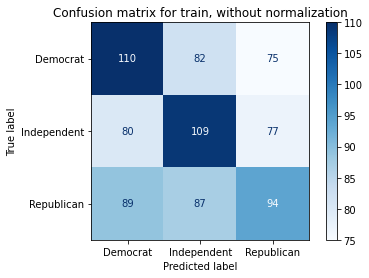

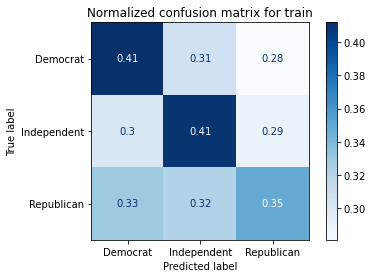

In [10]:


titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]


class_names = clf_lbfgs['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_lbfgs, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Thoughts

There wasnt much difference between the different penalities applied.  For robustness, I continued with the lbfgs.  If I understand the score correctly, then I am a bit disappoined.  Less than half the time the prediction was correct?  That doesnt seem too good.  This indicates that another model - or an ensemble model is probably required.  It might even be worse - the input data may not be the right data required to predict the party. 

## Random Forest Model

In [11]:
from sklearn.ensemble import RandomForestClassifier

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)])

# Append random forest classifier to preprocessing pipeline.
clf_rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])

clf_rf.fit(X_train, y_train)

print(f"Training score: {clf_rf.score(X_train, y_train):.3f}")
print(f"Test score: {clf_rf.score(X_test, y_test):.3f}")


Training score: 1.000
Test score: 0.338


## Confusion Matrix


Confusion matrix for train, without normalization
[[267   0   0]
 [  0 266   0]
 [  0   0 270]]
Normalized confusion matrix for train
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


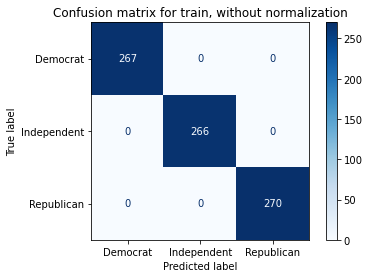

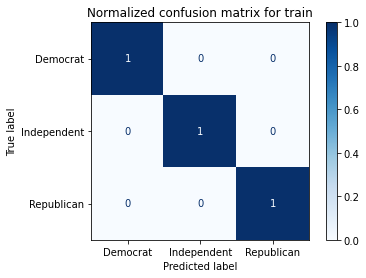

In [12]:
titles_options = [("Confusion matrix for train, without normalization", None),
                  ("Normalized confusion matrix for train", 'true')]


class_names = clf_rf['classifier'].classes_

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf_rf, X_train, y_train,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

## Thoughts
The training score of 1 indicates some overfitting to me.  Especially when the test score was close to the test score of the regression model.  I was expecting the random forest to perform a little better.

## Filed_2017 as Binary Target

In [13]:
numeric_cols17 = ['HHI', 'HHDL', 'CollegGrads', 'AHHAge', 'Cars']
categorical_cols17 = ['Married', 'PoliticalParty', 'Filed_2016', 'Filed_2015']

preprocessor17 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols17),
        ('cat', categorical_transformer, categorical_cols17)])

clf_model_lbfgs17 = LogisticRegression(penalty='l2', C=1, solver='lbfgs', max_iter=500)

clf_lbfgs17 = Pipeline(steps=[('preprocessor', preprocessor17),
                      ('classifier', clf_model_lbfgs17)])

dfT1 = tax_df.iloc[:, 0:6]
dfT2 = tax_df.iloc[:, 7:10]

X17 = tax_df.iloc[:, np.r_[0:6, 7:10]]

y17 = tax_df.iloc[:, 6]

X_train17, X_test17, y_train17, y_test17 = train_test_split(X17, y17, test_size=0.2, random_state=21)

clf_lbfgs17.fit(X_train17, y_train17)
print('Filed_2017 Target')
print(f"Regression Training score: {clf_lbfgs17.score(X_train17, y_train17):.3f}")
print(f"Regression Test score: {clf_lbfgs17.score(X_test17, y_test17):.3f}")

Filed_2017 Target
Regression Training score: 0.553
Regression Test score: 0.537


In [14]:
clf_rf17 = Pipeline(steps=[('preprocessor', preprocessor17),
                      ('classifier', RandomForestClassifier(oob_score=True, random_state=0))])

clf_rf17.fit(X_train17, y_train17)

print(f"RF Training score: {clf_rf17.score(X_train17, y_train17):.3f}")
print(f"RF Test score: {clf_rf17.score(X_test17, y_test17):.3f}")

RF Training score: 1.000
RF Test score: 0.542


## Thoughts

The score was better for both the regression and the random forest. This makes sense because since it is only trying to predict between two choices instead of three.